In [5]:
from IPython.display import HTML, Video, clear_output
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import numpy as np
from scipy import signal
# plt.style.use("classic")
# plt.style.use("bmh")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

def showLegend(axs):
	try:
		for ax in axs.flat: ax.legend()
	except TypeError:
		axs.legend()
	except AttributeError:
		axs.legend()

# Использование БПФ для анализа аудио

In [6]:
window_size = 501
hM1 = int(np.floor((window_size + 1) / 2)) # middle (destination)
hM2 = int(np.floor((window_size) / 2)) # middle (source)

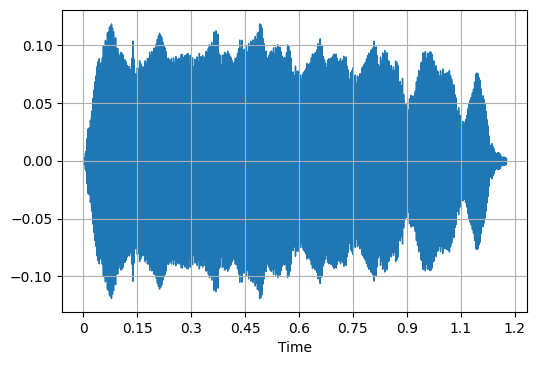

In [10]:
wave_data, sr = librosa.load('./sounds/soprano-E4.wav')
wave_windowed = wave_data[5000:5000+window_size] * np.hamming(window_size)

librosa.display.waveshow(wave_data, sr=sr)
plt.show()

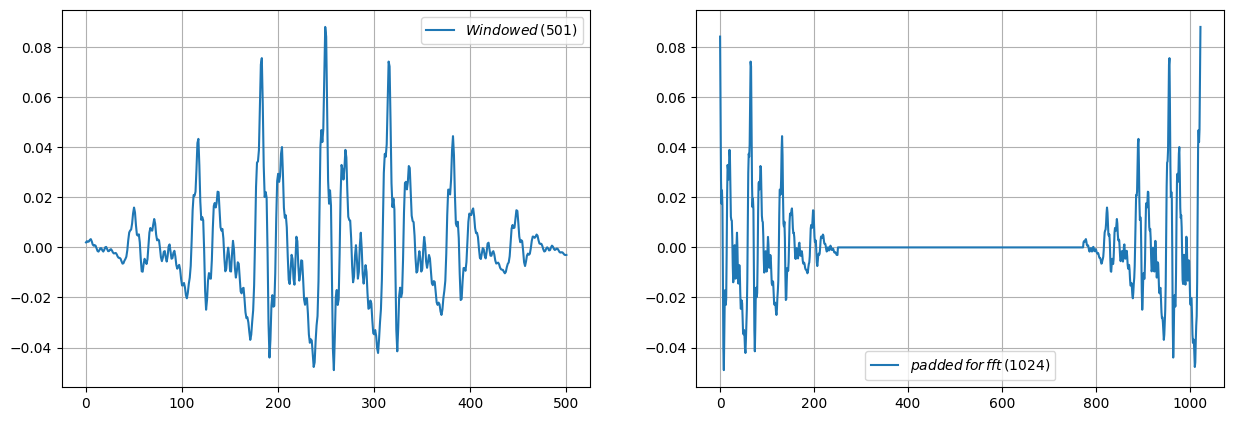

In [18]:
# zero-padding (now signal is centered around time=0)
n_fft = 1024
wave_for_fft = np.zeros(n_fft)
wave_for_fft[:hM1] = wave_windowed[hM2:]
wave_for_fft[n_fft-hM2:] = wave_windowed[:hM2]

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(np.arange(0, window_size), wave_windowed, label='$Windowed \, (501)$')
axs[1].plot(np.arange(0, n_fft), wave_for_fft, label='$padded \, for \, fft \, (1024)$')
showLegend(axs)
plt.show()

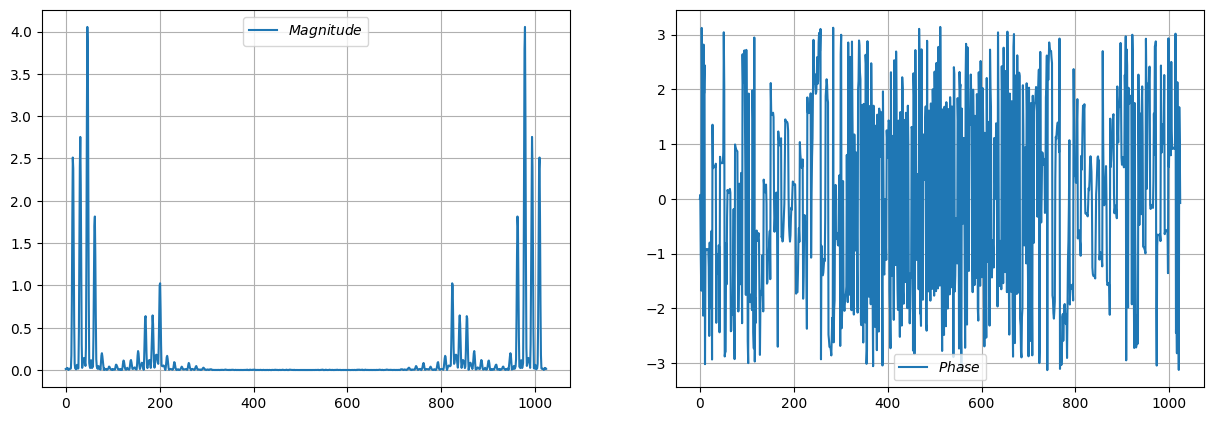

In [19]:
phasor = np.fft.fft(wave_for_fft)
magnitude = np.abs(phasor)
phase = np.angle(phasor)

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(np.arange(0, n_fft), magnitude, label='$Magnitude$')
axs[1].plot(np.arange(0, n_fft), phase, label='$Phase$')
showLegend(axs)
plt.show()

А теперь с амплитудой в логарифмическом формате и с развернутой фазой

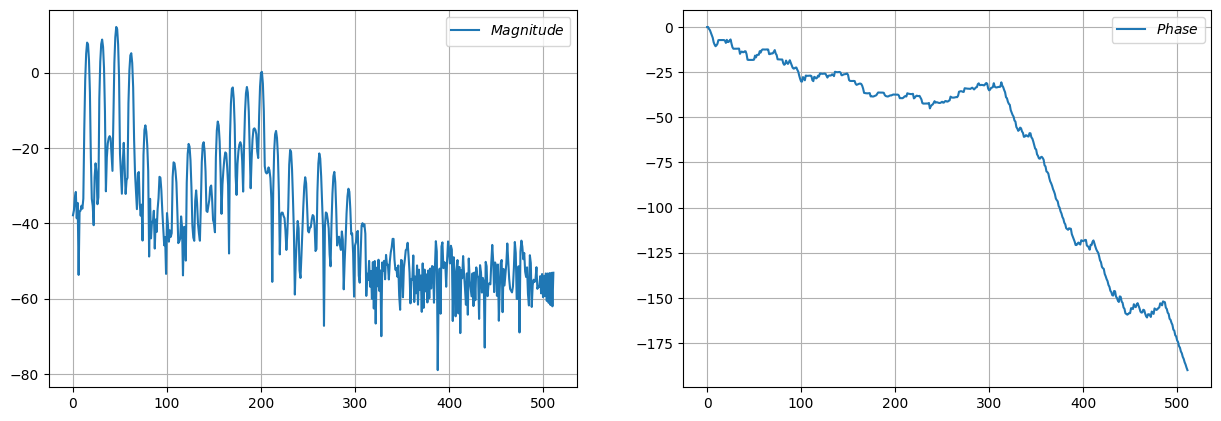

In [17]:
magnitudeLog = 20 * np.log10(np.abs(phasor))
phaseUW = np.unwrap(np.angle(phasor))

x_data = np.arange(0, n_fft // 2)
topIdx = len(magnitudeLog) // 2

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(x_data, magnitudeLog[:topIdx], label='$Magnitude$')
axs[1].plot(x_data, phaseUW[:topIdx], label='$Phase$')
showLegend(axs)
plt.show()

Необходимо понять, для какого типа окна какой размер hop size нужен. В идеале нужно получить постоянное значение 1 на промежутке выполнения оконного преобразования Фурье (например, для окна Блэкмана нужно 1/4 от размера окна).